In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARMAX/results/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARMAX/results


In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load

summaryModelsELM1S = pd.read_excel('grilla_ELM_NARMAX_1STEPS.xlsx', header=0)
summaryModelsELM2S = pd.read_excel('grilla_ELM_NARMAX_2STEPS.xlsx', header=0)
summaryModelsELM3S = pd.read_excel('grilla_ELM_NARMAX_3STEPS.xlsx', header=0)

grilla_ELM_NARMAX_AQP = pd.concat([summaryModelsELM1S, summaryModelsELM2S], ignore_index=True)
grilla_ELM_NARMAX_AQP = pd.concat([grilla_ELM_NARMAX_AQP, summaryModelsELM3S], ignore_index=True)

grilla_ELM_NARMAX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAPE                    42 non-null     float64
 1   delayedSteps            42 non-null     int64  
 2   nameModel               42 non-null     object 
 3   nameConfiguration       42 non-null     object 
 4   timeTrain (in seconds)  42 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.8+ KB


##La cantidad de modelos generados para el SVR NARX de DDFO fue de 42

In [5]:
rslt_df = grilla_ELM_NARMAX_AQP.sort_values('MAPE')
total = grilla_ELM_NARMAX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_ELM_NARMAX_AQP.describe()

Tiempo total: 0.33000000000000007


MAPE  delayedSteps  timeTrain (in seconds)
count   42.000000     42.000000               42.000000
mean    37.781989      2.000000                0.007857
std     16.254368      0.826394                0.010009
min     19.072444      1.000000                0.000000
25%     32.423004      1.000000                0.000000
50%     33.753801      2.000000                0.005000
75%     38.314418      3.000000                0.010000
max    108.522834      3.000000                0.030000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 1, lo que equivale a 0 horas aproximadamente. Además se tienen las estadisticas resumen.

In [6]:
rslt_df.iloc[:45,:]

MAPE  ...  timeTrain (in seconds)
14   19.072444  ...                    0.00
0    19.260629  ...                    0.03
28   21.111328  ...                    0.00
29   22.583688  ...                    0.00
15   24.171933  ...                    0.00
1    24.451783  ...                    0.00
7    26.522011  ...                    0.00
33   29.645391  ...                    0.00
27   31.863906  ...                    0.03
8    32.099324  ...                    0.01
23   32.277933  ...                    0.01
25   32.858218  ...                    0.01
13   32.973892  ...                    0.03
38   33.016976  ...                    0.01
12   33.048504  ...                    0.03
26   33.254718  ...                    0.03
11   33.526691  ...                    0.01
40   33.539542  ...                    0.02
9    33.563038  ...                    0.01
4    33.571615  ...                    0.00
39   33.607352  ...                    0.01
41   33.900250  ...                    0.02
19   33.954122  ...                    0.00
31   34.273435  ...                    0.00
24   35.007168  ...                    0.01
22   35.458010  ...                    0.01
21   35.595741  ...                    0.00
10   35.820275  ...                    0.01
35   35.850113  ...                    0.00
20   36.620650  ...                    0.00
37   38.222655  ...                    0.01
36   38.345005  ...                    0.01
18   39.402188  ...                    0.00
5    40.229503  ...                    0.00
34   40.802763  ...                    0.01
6    42.206081  ...                    0.01
32   47.170680  ...                    0.00
30   49.098269  ...                    0.00
3    56.477915  ...                    0.00
2    72.892633  ...                    0.00
16   80.972331  ...                    0.00
17  108.522834  ...                    0.00

[42 rows x 5 columns]

In [8]:
rslt_df.iloc[0,:]

MAPE                                                    19.0724
delayedSteps                                                  2
nameModel                     results/ELM_28_1_10_mse_2S.joblib
nameConfiguration         results/ELM_28_1_10_mse_2S_config.npy
timeTrain (in seconds)                                        0
Name: 14, dtype: object

In [9]:
bestModel = rslt_df.iloc[0,:]
print(bestModel)

MAPE                                                    19.0724
delayedSteps                                                  2
nameModel                     results/ELM_28_1_10_mse_2S.joblib
nameConfiguration         results/ELM_28_1_10_mse_2S_config.npy
timeTrain (in seconds)                                        0
Name: 14, dtype: object


In [10]:
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/ELM_28_1_10_mse_2S_config.npy
results/ELM_28_1_10_mse_2S.joblib


In [11]:
print(bestModel['nameConfiguration'].split("/")[1])
print(bestModel['nameModel'].split("/")[1])

ELM_28_1_10_mse_2S_config.npy
ELM_28_1_10_mse_2S.joblib


In [14]:
import time


def _mean_squared_error(y, pred):
    return 0.5 * np.mean((y - pred) ** 2)


def _mean_abs_error(y, pred):
    return np.mean(np.abs(y - pred))


def _sigmoid(x):
    return 1. / (1. + np.exp(-x))


def _identity(x):
    return x



def getActivation(name):
    return {
        'sigmoid': _sigmoid
    }[name]


def getLoss(name):
    return {
        'mse': _mean_squared_error,
        'mae': _mean_abs_error
    }[name]


class ELM:
    def __init__(self, num_input_nodes, num_hidden_units, num_out_units, activation='sigmoid',
                 loss='mse', beta_init=None, w_init=None, bias_init=None):
        self._num_input_nodes = num_input_nodes
        self._num_hidden_units = num_hidden_units
        self._num_out_units = num_out_units

        self._activation = getActivation(activation)
        self._loss = getLoss(loss)

        if isinstance(beta_init, np.ndarray):
            self._beta = beta_init
        else:
            self._beta = np.random.uniform(-1., 1., size=(self._num_hidden_units, self._num_out_units))

        if isinstance(w_init, np.ndarray):
            self._w = w_init
        else:
            self._w = np.random.uniform(-1, 1, size=(self._num_input_nodes, self._num_hidden_units))

        if isinstance(bias_init, np.ndarray):
            self._bias = bias_init
        else:
            self._bias = np.zeros(shape=(self._num_hidden_units,))

        #print('Bias shape:', self._bias.shape)
        #print('W shape:', self._w.shape)
        #print('Beta shape:', self._beta.shape)

    def fit(self, X, Y, display_time=False):
        H = self._activation(X.dot(self._w) + self._bias)

        # Moore–Penrose pseudo inverse
        if display_time:
            start = time.time()
        H_pinv = np.linalg.pinv(H)
        if display_time:
            stop = time.time()
            print(f'Train time: {stop-start}')

        self._beta = H_pinv.dot(Y)

        # print('Fit Beta shape:', self._beta.shape)

    def __call__(self, X):
        H = self._activation(X.dot(self._w) + self._bias)
        return H.dot(self._beta)

    def evaluate(self, X, Y):
        pred = self(X)

        # Loss (base on model setting)
        loss = self._loss(Y, pred)

        # Accuracy
        #acc = np.sum(np.argmax(pred, axis=-1) == np.argmax(Y, axis=-1)) / len(Y)

        # Unweighted Average Recall
        # TODO

        #return loss, acc, pred
        return loss, pred

In [15]:
#para recuperar configDict
config=np.load(bestModel['nameConfiguration'].split("/")[1],allow_pickle='TRUE').item()
print(config)

#Para cargar modelo:
saved_model = load(bestModel['nameModel'].split("/")[1]) 

{'nInputs': 28, 'nOutputs': 1, 'nHiddenUnits': 10, 'Loss': 'mse', 'Delays': 2, 'PredictionHorizon': 1}


In [16]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/dataTrainNarmaxScaledELM.csv', header=0)
  testDFScaled = pd.read_csv('data/dataTestNarmaxScaledELM.csv', header=0)
  trainDF = pd.read_csv('data/dataTrainNarmaxELM.csv', header=0)
  testDF = pd.read_csv('data/dataTestNarmaxELM.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


# calculate the error between an actual and predicted value
def mae(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)
 
def mape(actual,pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

def evaluate_forecasts(predictions, testData):
  total_mae = 0.0
  total_mape = 0.0
  total_c = 0
  for i in range(len(predictions)):
    real = testData[i]
    predicted = predictions[i]
    # calculate error
    error_mae = mae(real, predicted)
    error_mape = mape(real, predicted)
    # update statistics
    total_mae += error_mae
    total_mape += error_mape
    total_c += 1
  # normalize summed absolute errors
  total_mae /= total_c
  total_mape /= total_c
  return total_mae, total_mape


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 12):
  X = list()
  y = list()
  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      #print(xAux.shape)
      #print(xAux)
      X.append(xAux)
      y.append(salidaAux)
      #print(salidaAux)
    indexAux = indexAux + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY



def reshapeXdata(trainXScaled, testXScaled):
  #reshape data
  trainXScaled = trainXScaled.reshape((trainXScaled.shape[0],trainXScaled.shape[1]*trainXScaled.shape[2]))
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  testXScaled = testXScaled.reshape((testXScaled.shape[0],testXScaled.shape[1]*testXScaled.shape[2]))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  return trainXScaled, testXScaled


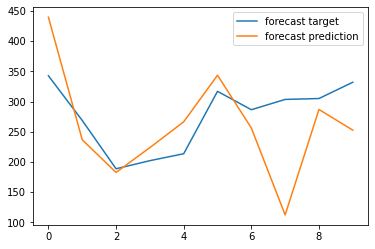

In [17]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 1, trainDFScaled, testDFScaled, trainDF, testDF)
trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:]
val_loss, validation_predictions = saved_model.evaluate(testXScaled[:,:], validation_target)
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()